In [1]:
from typing import Optional

In [2]:
# if you are in the root folder, don't run this line
import os

os.chdir("..")
os.getcwd()

'/home/jibancat/Documents/PYTHON/emu_slhd'

In [4]:
from typing import List

import numpy as np
from matplotlib import pyplot as plt
import matplotlib

from matter_multi_fidelity_emu.gpemulator_singlebin import (
    SingleBinGP,
    SingleBinLinearGP,
    SingleBinNonLinearGP,
)

In [5]:
def generate_data(folder: str = "data_slhd/slhd_60_dmonly256_256mpc_3-sl-0-1-2_dmonly512_256mpc_mpgadgetpower/"):
    data = PowerSpecs(folder=folder)
    return data
plt.loglog(10**data.kf, 10**data.Y_train[1][0])

## Find the HR choices

The following outlines the procedure to select 3 cosmologies for high-fidelity training set
out of low-fidelity latin hypercube (which has 50 cosmologies).

This simple procedure will find the optimal 2 cosmologies first by optizing the low-fidelity only
emulator. This is done by searching all combinations of 2 cosmologies in the LF lating hypercube.

Conditioning on the selected 2 cosmologies, we perform the optimization again to find the 3rd
high-fidelity selection.

In [6]:
# acquire data object, the text files 
data = generate_data()

i_fidelity = 0

X = data.X_train_norm[i_fidelity]
Y = data.Y_train[i_fidelity]

train_opt = TrainSetOptimize(X=X, Y=Y)

# find the optimal two indices first;
# looking for all possible combinations
num_samples, _ = data.X_train[0].shape
num_selected = 3

all_combinations = list(combinations(range(num_samples), num_selected))

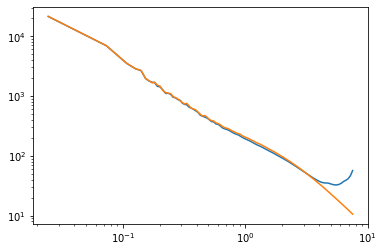

In [7]:
plt.loglog(10**data.kf, 10**data.Y_train[0][0])
plt.loglog(10**data.kf, 10**data.Y_train[1][0])

In [12]:
%%capture
# loop over to get the least loss 2 indices
all_loss = []

for i,selected_index in enumerate(all_combinations):

    # need to convert to boolean array
    ind = np.zeros(num_samples, dtype=np.bool)
    ind[np.array(selected_index)] = True

    loss = train_opt.loss(ind)
    
    print("iteration:", i)

    all_loss.append(loss)

In [13]:
# find the set of indices best minimize the loss
selected_index = np.array(all_combinations[np.argmin(all_loss)])

selected_index

array([21, 31, 56])

## Procedure to find the next optimal index

In [10]:
# find the 3rd HighRes selection
prev_ind = np.zeros(num_samples, dtype=np.bool)
prev_ind[np.array(selected_index)] = True

assert np.sum(prev_ind) == len(selected_index)

In [11]:
%%capture
next_index, all_next_loss = train_opt.optimize(prev_ind,)

In [12]:
# optimal next selection indices
optimal_index = np.append(selected_index, next_index)

optimal_index

array([35, 38, 36])

In [13]:
# the high-fidelity selection is a subset of low-fidelity latin hypercube
# the above cell output means 19th, 37th and 45th cosmologies are the
# choice for the high-fidelity simulation training set.

In [14]:
# cosmologies:
# "omega0", "omegab", "hubble", "scalar_amp", "ns"
data.X_train[0][optimal_index]

array([[3.69333333e-01, 4.45000000e-02, 7.25000000e-01, 2.18666667e-09,
        9.84666667e-01],
       [3.56000000e-01, 4.61666667e-02, 6.11000000e-01, 2.04000000e-09,
        9.40666667e-01],
       [2.84000000e-01, 5.81666667e-02, 6.81000000e-01, 2.36000000e-09,
        9.83333333e-01]])

## Procedure to select the best slice

In [8]:
# loop over each slice and seclect the best slice
# The number of slices
num_slices = 20
# The number of design points (runs) in each slice.
len_slice = 3

all_slices = np.arange(len_slice * num_slices).reshape(num_slices, len_slice)

# loop over to get all losses for all slices
all_slice_loss = []


for i,selected_index in enumerate(all_slices):

    # need to convert to boolean array
    ind = np.zeros(num_samples, dtype=np.bool)
    ind[np.array(selected_index)] = True

    loss = train_opt.loss(ind)
    
    print("iteration:", i)

    all_slice_loss.append(loss)

Optimization restart 1/5, f = -29.37325459569888
Optimization restart 2/5, f = -29.37325230936426
Optimization restart 3/5, f = -29.373252663283836
Optimization restart 4/5, f = -28.86126675626275


 /home/jibancat/.pyenv/versions/miniconda3-4.3.31/lib/python3.6/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /home/jibancat/.pyenv/versions/miniconda3-4.3.31/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


Optimization restart 5/5, f = -29.373253254307315
iteration: 0
Optimization restart 1/5, f = 92.28365075772558
Optimization restart 2/5, f = 92.28371185209824
Optimization restart 3/5, f = 92.28364974482224
Optimization restart 4/5, f = 92.28365070633998
Optimization restart 5/5, f = 92.28365656404708
iteration: 1
Optimization restart 1/5, f = -90.82621697244895
Optimization restart 2/5, f = -90.82623522269967
Optimization restart 3/5, f = -90.82623541716816
Optimization restart 4/5, f = -90.82620597874234
Optimization restart 5/5, f = -90.8260176971898
iteration: 2
Optimization restart 1/5, f = 58.91577787053808
Optimization restart 2/5, f = 58.91577657781369
Optimization restart 3/5, f = 58.91579307022687
Optimization restart 4/5, f = 58.91600607654715
Optimization restart 5/5, f = 58.915775512384016
iteration: 3
Optimization restart 1/5, f = 91.58513013568682
Optimization restart 2/5, f = 91.58492583642249
Optimization restart 3/5, f = 91.58492700406197
Optimization restart 4/5, f =

 /home/jibancat/.pyenv/versions/miniconda3-4.3.31/lib/python3.6/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 1/5, f = 203.7291596536088
Optimization restart 2/5, f = 203.72914864470823
Optimization restart 3/5, f = 203.72914588183306
Optimization restart 4/5, f = 203.72915309502824
Optimization restart 5/5, f = 203.72914607681184
iteration: 19


In [9]:
all_slice_loss

[0.014290675430176649,
 0.023392769184441182,
 0.02563827194395652,
 0.02797731586520034,
 0.051000111558554086,
 0.010381539034716385,
 0.023152517425824765,
 0.015824269361890013,
 0.07494134034021767,
 0.009209836356578328,
 0.03054693993340719,
 0.03848394716679308,
 0.026660847691670098,
 0.08422682986948411,
 0.021055380436598607,
 0.03129487395627106,
 0.02978107902907923,
 0.043153762239831424,
 0.07032301110871679,
 0.008436106988738899]

In [17]:
def better_than(
        num_selected: int, num_samples: int, selected_index: List, all_z_loss: List,
        loss_sum_z: Optional[List], zout: List,
    )-> None:
    """
    Small function to check the performance of your selection across redshifts. 

    Parameters:
    ----
    num_selected: the number of selected HF simulations.
    num_samples: the total number of simulations in LF.
    selected_index: the selected optimal index, shape=(num of selected points)
    all_z_loss: the loss of LF emulator, shape=(zs, num of selections)
    loss_sum_z: the loss of LF emulator across redshifts, shape=(num of selections, )
    zout: redshifts, shape=(zs, )
    """

    all_combinations = np.array(list(combinations(range(num_samples), num_selected)))

    # what's the index of our optimal selection
    idx = np.where(np.all(all_combinations == np.sort(selected_index), axis=1))[0][0]

#     for i, loss in enumerate(all_z_loss):
    # how many selections have larger loss than our optimal one?
    better_than = np.sum(loss[idx] < np.array(loss)) / len(loss)
    print("Better than {:.3g} of the selections at z = {:.2g}".format(better_than, zout[i]))

    # compared with summing across redshifts
    better_than = np.sum(loss_sum_z[idx] < np.array(loss_sum_z)) / len(loss_sum_z)
    print("Better than {:.3g} of the selections (summing over all redshifts)".format(better_than))


In [21]:
for i,loss in enumerate(all_slice_loss):
    better_than = np.sum(all_slice_loss[i] < np.array(all_loss)) / len(all_loss)
    
    print("{} slice. Better than {:.3g} of the selections".format(i, better_than))


0 slice. Better than 0.881 of the selections
1 slice. Better than 0.734 of the selections
2 slice. Better than 0.69 of the selections
3 slice. Better than 0.634 of the selections
4 slice. Better than 0.321 of the selections
5 slice. Better than 0.958 of the selections
6 slice. Better than 0.738 of the selections
7 slice. Better than 0.854 of the selections
8 slice. Better than 0.198 of the selections
9 slice. Better than 0.973 of the selections
10 slice. Better than 0.577 of the selections
11 slice. Better than 0.441 of the selections
12 slice. Better than 0.665 of the selections
13 slice. Better than 0.172 of the selections
14 slice. Better than 0.773 of the selections
15 slice. Better than 0.56 of the selections
16 slice. Better than 0.595 of the selections
17 slice. Better than 0.391 of the selections
18 slice. Better than 0.216 of the selections
19 slice. Better than 0.983 of the selections


Select two of them, worst loss 13 and best loss 19 

In [23]:
all_slices[13]

array([39, 40, 41])